### Project's Description

**Content**
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries <br>

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository and its corresponding economic data was collected from United Nation website. <br>

In this project we have considered data from year 2000-2015 for 193 countries for further analysis. The final dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

**Variable Descriptions:** <br>
1. **country** (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo) <br>
2. **year**(Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015) <br>
3. **status** (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. **life_expectancy** (Ratio) - the life expectancy of people in years for a particular country and year
5. **adult_mortality** (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6. **infant_deaths** (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7. **alcohol**(Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8. **percentage_expenditure** (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. **hepatitis_b** (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. **measles** (Ratio) - number of reported Measles cases per 1000 population
11. **bmi** (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. **under-five_deaths** (Ratio) - number of people under the age of five deaths per 1000 population
13. **polio** (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. **total_expenditure** (Ratio) - government expenditure on health as a percentage of total government expenditure
15. **diphtheria** (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. **hiv/aids** (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. **gdp** (Ratio) - Gross Domestic Product per capita
18. **population** (Ratio) - population of a country
19. **thinness_1-19_years** (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. **thinness_5-9_years** (Ratio) - rate of thinness among people aged 5-9
21. **income_composition_of_resources** (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. **schooling** (Ratio) - average number of years of schooling of a population



**Intro for students** <br>
..... Today we will be  DA consultants for WHO. In particular WHO is interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization.  Also WHO's previous approach included BMI and body weight related measures, but now they're sure that averages of these indicators are the same for both categories, thus, these parameters should not be included in their methodology anymore. 

Today  and on the next workshop we will:
1. See how average life expectancy is different for developed/developing countries
2. Identify countries that are in "risk" zone for mortality.
3. Try to find a paradox in GDP vs expenditure on health within developed/developing
4. Create a "profile analysis" for immunization in developed/developing countries
5. Check whether BMI and body weight related measure should be included in the methodology of WHO

**Why WHO needs that?**
One of the goals of WHO is helping countries in creating better health programs. Over the years they've created several methods on analyzing which parameters work better/worse for specific countries. They have already filtered out some of the parameters that they're particular interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization. If WHO knows which indicators are the same for two types of countires and which are different, it will help them to adjust recommendations for types of countries, make them more unique.

In [77]:
# needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats

In [78]:
data = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project3/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [79]:
data.shape

(2938, 22)

In [80]:
#renaming columns
data.columns=data.columns.str.lower()
data.columns=data.columns.str.strip()
data.columns=data.columns.str.replace(' ','_').str.replace('-','_').str.replace('/', '_')
data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

## Task 4: Analysis of immunization

**For each country find an average immunization rate for all years. Calculate the mean, dispersion, standard deviation. Plot histograms, describe how distributions varies among two groups of countries**

So this task will be close to the one in the project that you will by the end of this course!

In [81]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


"Let's find average immunization rate for each country" 

In [82]:
immunization=data.groupby(['country','status'])[['hepatitis_b','diphtheria','polio']].mean().reset_index()
immunization.head()

,country,status,hepatitis_b,diphtheria,polio
0,Afghanistan,Developing,64.562500,52.3125,48.3750
1,Albania,Developing,98.000000,98.0625,98.1250
2,Algeria,Developing,78.000000,91.8750,91.7500
3,Angola,Developing,70.222222,47.6875,46.1250
4,Antigua and Barbuda,Developing,98.266667,98.3125,96.9375


We can automate the process from the task. Last time we've built histograms, calculated mean/std/var and cv, so we can bring everything in one function.

In [83]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [84]:
def immunization_stat(vaccine):
    plt.figure(figsize=(8,7))
    sns.histplot(immunization, x=vaccine, hue="status")
    plt.show()
    
    mean=round(immunization[vaccine].mean())
    std=round(immunization[vaccine].std())
    var=round(immunization[vaccine].var())

    
    print("The overall average for",vaccine, "is:", mean)
    print("The variance for",vaccine, "is:", var)
    print("The standard deviation for",vaccine, "is:", std)
    print("The averages per status:")
    print(immunization.groupby(['status'])[vaccine].mean())

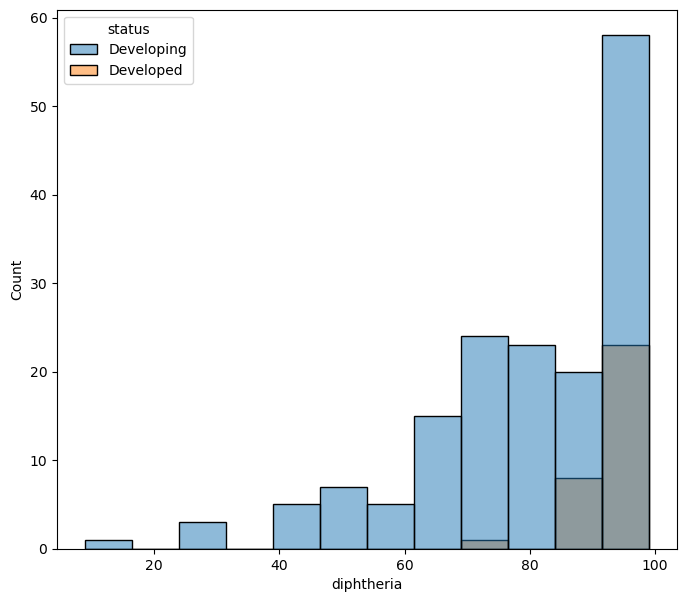

The overall average for diphtheria is: 82
The variance for diphtheria is: 295
The standard deviation for diphtheria is: 17
The averages per status:
status
Developed     93.476562
Developing    79.992791
Name: diphtheria, dtype: float64


In [85]:
immunization_stat('diphtheria')

**Task for students:**<br>
On your own check other 2 vaccines, and answer the following questions:
1. Which vaccine out of all 3 has the highest average immunization rate across all countries.
2. Which vaccine has the lowest rate in developing countries?

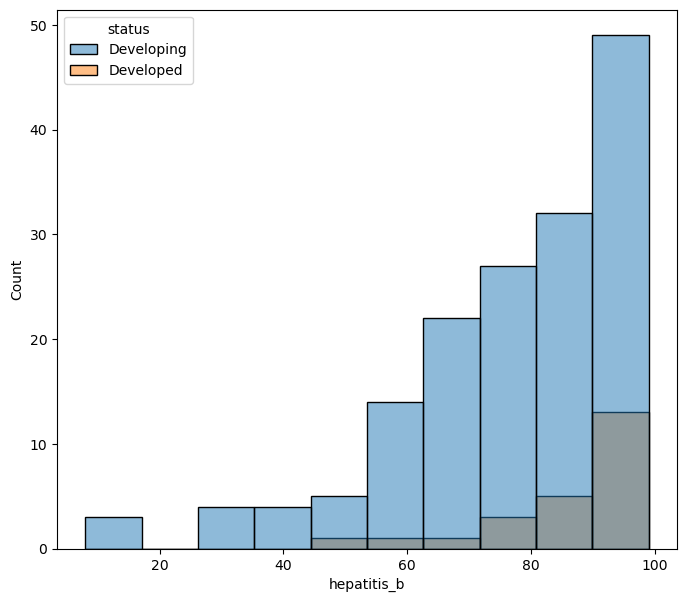

The overall average for hepatitis_b is: 79
The variance for hepatitis_b is: 354
The standard deviation for hepatitis_b is: 19
The averages per status:
status
Developed     86.194989
Developing    77.366776
Name: hepatitis_b, dtype: float64


In [86]:
immunization_stat('hepatitis_b')

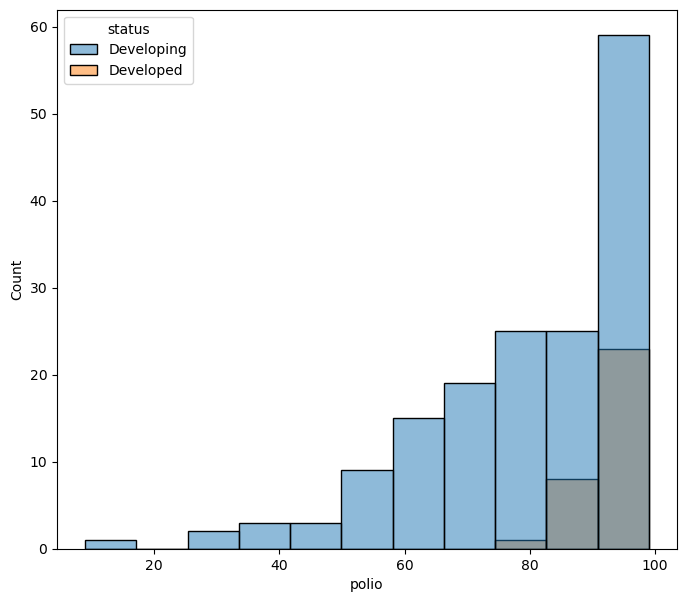

The overall average for polio is: 82
The variance for polio is: 279
The standard deviation for polio is: 17
The averages per status:
status
Developed     93.736328
Developing    80.183319
Name: polio, dtype: float64


In [87]:
immunization_stat('polio')

Answers: 
1. Polio
2. Hepapatitis B

## Task 5: Checking WHO's hypothesis on whether averages of body weight indicators are the same for developed and developing countries

First, what parameters should we take? What parameters belong to  body weight indicators?

In [92]:
bmi=data[['country','status','bmi','thinness__1_19_years','thinness_5_9_years']]
bmi.head()

,country,status,bmi,thinness__1_19_years,thinness_5_9_years
0,Afghanistan,Developing,19.1,17.2,17.3
1,Afghanistan,Developing,18.6,17.5,17.5
2,Afghanistan,Developing,18.1,17.7,17.7
3,Afghanistan,Developing,17.6,17.9,18.0
4,Afghanistan,Developing,17.2,18.2,18.2


Let's formulate hypothesis that we're going to check. In statistical testing we're calling it Null Hypothesis, it's always about equality of the groups, or that the difference between two groups is equal to zero (null, thus the name of hypothesis)

Let's start with the first parameter: BMI index. 
Null Hypothesis will be smth like  <br>
"*Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing  countries*"

What do we need to prove this hypothesis? Define the averages! But we have to check distributions and tell which average value should be used for hypothesis!

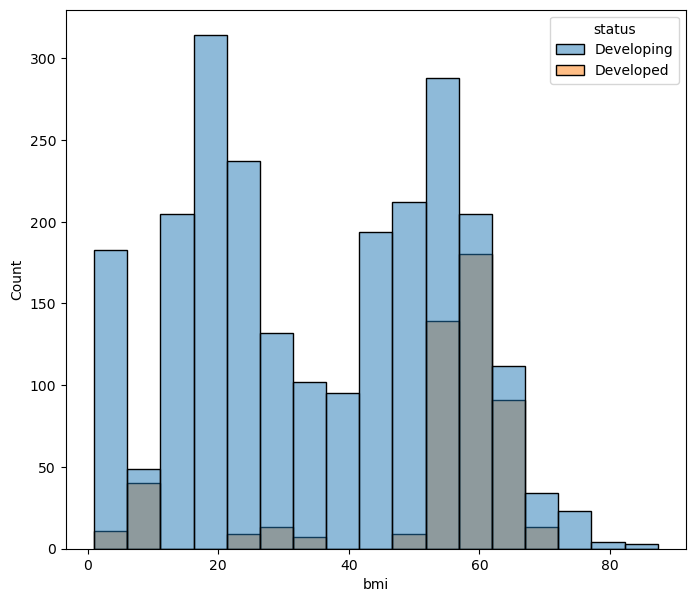

In [96]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(bmi, x="bmi", hue="status")

Not normal, should use median

In [97]:
bmi.groupby(['status'])['bmi'].median()

status
Developed     57.45
Developing    35.20
Name: bmi, dtype: float64

The difference between groups in median is actually pretty big, so the null hypothesis of WHO is wrong!

What do we suggest to WHO regarding the hypothesis? That we can't exclude bmi from the model, cause it's different for the groups. Let's move to another feature - `_thinness__1-19_years`:

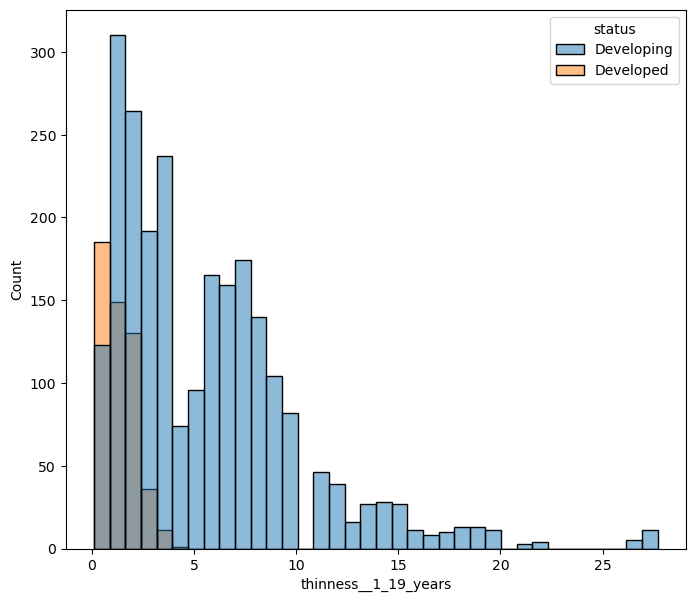

In [100]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(bmi, x="thinness__1_19_years", hue="status")

Let's look at all features related to weight in a form of a table:

In [101]:
bmi

,country,status,bmi,thinness__1_19_years,thinness_5_9_years
0,Afghanistan,Developing,19.1,17.2,17.3
1,Afghanistan,Developing,18.6,17.5,17.5
2,Afghanistan,Developing,18.1,17.7,17.7
3,Afghanistan,Developing,17.6,17.9,18.0
4,Afghanistan,Developing,17.2,18.2,18.2
...,...,...,...,...,...
2933,Zimbabwe,Developing,27.1,9.4,9.4
2934,Zimbabwe,Developing,26.7,9.8,9.9
2935,Zimbabwe,Developing,26.3,1.2,1.3
2936,Zimbabwe,Developing,25.9,1.6,1.7


In [104]:
bmi.groupby(['status'])[['bmi', 'thinness__1_19_years', 'thinness_5_9_years']].median()

,bmi,thinness__1_19_years,thinness_5_9_years
status,,,
Developed,57.45,1.1,1.0
Developing,35.20,4.5,4.6


All weight indicators differ for categories, so we can't exclude them from the model. Before we move on, let's have a look at all medians/means between groups:

In [107]:
# median
data.groupby(['status'])[['bmi', 'thinness__1_19_years', 'thinness_5_9_years']].median().T.astype(int)

status,Developed,Developing
bmi,57,35
thinness__1_19_years,1,4
thinness_5_9_years,1,4


In [108]:
# mean
data.groupby(['status'])[['bmi', 'thinness__1_19_years', 'thinness_5_9_years']].mean().T.astype(int)

status,Developed,Developing
bmi,51,35
thinness__1_19_years,1,5
thinness_5_9_years,1,5


While for some parameters the difference in average  is obvious, for others, like hepatitis_b  is not. In statistics we never just do the comparison on average, because average (even median) doesn't fulle represent the distribution. To prove that averages are not the same between groups we're using hypothesis testing

### Theory on t-test 

**What did we study in this sprint that can help us compare two groups together?** t-tests!

**What do we need to use t-test?**
Samples from populations

Since we have limited number of countries and limites number of years - we're working with samples! <br>

But what would be population for this dataset? How it would look like?" <br>
**Answer:** "parameters for all years for all countries"

Let's define two datasets for future samples of "developed" and "developing" countries.

In [113]:
developed=data.query('status=="Developed"')
developing=data.query('status=="Developing"')


Ok, samples are defined. Any chosen column can be sample. 

Let's get back to out BMI identificator. We've already stated Null Hypothesis: "Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing countries" What other Hypothesis do we need? What is the opposite to this statement? 

**H0:** "Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing countries" <br>
**HA:** "Average yearly BMI index of Developed countries does not equal to Average yearly BMI index of Developing countries"

Once we've defined hypothesis, what do we do with them?

In [111]:
sample1=developed['bmi']
sample2=developing['bmi']

In [114]:
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=nan, pvalue=nan, df=nan)

Oops? What happened? ttest_ind returns nan in pvalue if you have missing values in samples. You can omit them using nan_policy parameter

In [115]:
stats.ttest_ind(sample1, sample2, nan_policy='omit')

TtestResult(statistic=17.64395264477269, pvalue=2.896770114683063e-66, df=2902.0)

You can use p-value from the method like this (using an attribute):

In [ ]:
p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit').pvalue
p_value

2.896770114683063e-66

So do we reject or fail to reject our Null Hypothesis?

In [ ]:
p_value=p_value.astype(int)
alpha=0.05
if p_value<alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
    and sample 2 are not the same")

Reject H0: average of sample 1 is not equal to average of sample 2


Now we have a statistical proof that bmi is not the same for developed and developing countries and thus, should be included  as a parameter in the models/recommendations of WHO. Let's create a function that will make our testing easier

In [117]:
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2, nan_policy='omit').pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
        and sample 2 are not the same") 

Let's try this function on the next weight-related index:_thinness_5-9_years

In [119]:
t_test(developed['thinness_5_9_years'],developing['thinness_5_9_years'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


Great!Our function works! Now we can check each of the parameter and, if we can't prove that for some parameters the average are not equal, we will recommend WHO to exlude these parameters from methodology. But before we start checking other parameters, there is something about t-test that we should know

While normality is not that of a strict requirement and t-test can handle slightly abnormal data ( we will talk about alternative tests for non-normal data later in the course) , the equality of variance should be checked to decide whether a t-test is appropriate for a given dataset. Stats.ttest_ind even have special parameter for that.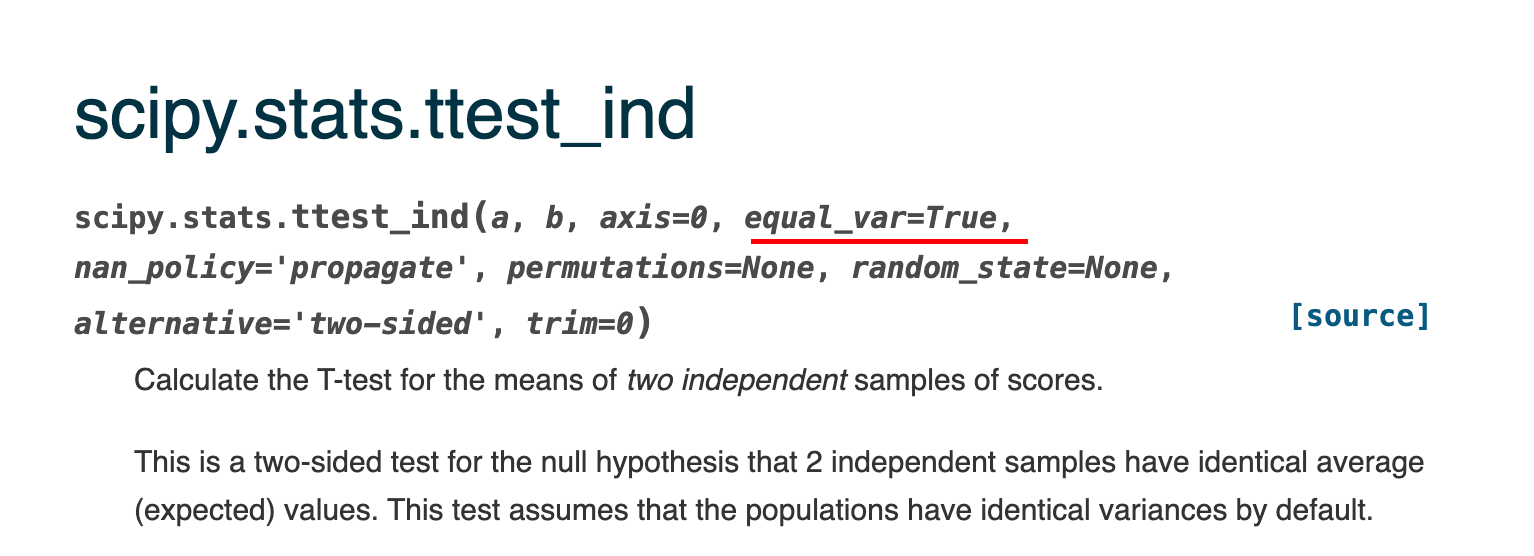

But how do we define if variances are equal or not? We can use special tests for that: either Levene or Bartlett’s. It works just like t-test, but instead of checking averages, it checks the variances

In [ ]:
p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
if p_value_levene<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 \
    and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_84488/2614660269.py:1: RuntimeWarning: invalid value encountered in cast
  p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)


Let's include that in our function, so that our testing is more accurate

In [ ]:
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
    
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=stats.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
        and sample 2 are not the same") 

Let's test it on our last weight-related parameter

In [ ]:
 t_test(developed['_thinness__1-19_years'],developing['_thinness__1-19_years'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_84488/3867670028.py:2: RuntimeWarning: invalid value encountered in cast
  p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)


Now we have a function that can test differences between developed and developing countries for all parameters! Now we can iterate over all of them and find out which parameters are equal and we can exclude them from the model

In [ ]:
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print(i)

life_expectancy_
adult_mortality
infant_deaths
alcohol
percentage_expenditure
hepatitis_b
measles_
_bmi_
under-five_deaths_
polio
total_expenditure
diphtheria_
_hiv/aids
gdp
population
_thinness__1-19_years
_thinness_5-9_years
income_composition_of_resources
schooling


Now let's actually call our function on each parameter!

In [120]:
print(data.columns)
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print('Result for :',i)
        t_test(developed[i],developing[i],alpha=0.05)
        print('----------------------------')

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')
Result for : life_expectancy
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : adult_mortality
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : infant_deaths
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : alcohol
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : percentage_expenditure
Reject H0: average of sample 1 is not equal to average of sample 2
---

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Congratulations! We successfully ran an hypothesis testing on all the parameters and now we know , that we can't exclude anything from the model, since all of the parameters are indeed different for two types of countries

But, while groups are different in the parameters, WHO also wants to know whether the "cut off" that they make in determing whether country is developed or developing is accurate. They have doubts and think that maybe top developing and worst developed countries are not that far from each other. Let's check that also

**Given that, our goal is:**
- find out the top developing country and the worst developed country based on max and min gdp in the group accordingly. 
- create sample datasets with all parameters only for these 2 countries
- check the differences between these two countries for all of the parameters
- conclude whether these countries are really different and WHO's methodology works. If they're the same, in which way?

Solution:

In [ ]:
b_depd_country=developed[developed.gdp==developed.gdp.min()]['country'].iloc[0]
b_depd_country

'Romania'

In [ ]:
t_deping_country=developing[developing.gdp==developing.gdp.max()]['country'].iloc[0]
t_deping_country

'Qatar'

In [ ]:
bottom_developed=developed.query('country==@b_depd_country')
bottom_developed.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2119,Romania,2015,Developed,75.0,133.0,2,NaN,0.000000,9.0,4,...,89.0,NaN,89.0,0.1,8958.788593,19815481.0,2.5,2.7,0.798,14.7
2120,Romania,2014,Developed,74.8,135.0,2,0.01,1.576409,94.0,59,...,94.0,5.57,94.0,0.1,12.277330,1998979.0,2.6,2.8,0.797,14.7
2121,Romania,2013,Developed,74.6,138.0,2,9.59,1230.748231,96.0,1159,...,88.0,5.60,92.0,0.1,9585.266593,19983693.0,2.7,2.9,0.794,14.7
2122,Romania,2012,Developed,74.4,138.0,2,9.58,1078.358105,96.0,7450,...,92.0,5.48,91.0,0.1,8558.397660,25835.0,2.8,3.0,0.797,15.3
2123,Romania,2011,Developed,74.3,139.0,2,9.10,10.325889,96.0,4189,...,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7


In [ ]:
top_developing=developing.query('country==@t_deping_country')
top_developing.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2071,Qatar,2015,Developing,78.2,68.0,0,NaN,0.000000,99.0,18,...,99.0,NaN,99.0,0.1,66346.52267,NaN,5.2,4.9,0.855,13.4
2072,Qatar,2014,Developing,78.1,69.0,0,1.15,5063.513104,89.0,46,...,99.0,2.19,89.0,0.1,86852.71190,NaN,5.2,4.8,0.854,13.4
2073,Qatar,2013,Developing,77.9,7.0,0,1.20,515.073479,97.0,73,...,99.0,2.15,97.0,0.1,8834.87958,NaN,5.1,4.7,0.843,13.4
2074,Qatar,2012,Developing,77.8,72.0,0,1.13,5163.329180,93.0,160,...,93.0,2.16,92.0,0.1,88564.82298,NaN,5.1,4.7,0.837,13.4
2075,Qatar,2011,Developing,77.5,74.0,0,1.16,4409.170670,93.0,101,...,92.0,1.93,93.0,0.1,85948.74600,NaN,5.1,4.6,0.827,12.4


In [ ]:
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print('Result for :',i)
        t_test(bottom_developed[i],top_developing[i],alpha=0.05)
        print('----------------------------')

Result for : life_expectancy_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : adult_mortality
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : infant_deaths
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : alcohol
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : percentage_expenditure
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : hepatitis_b
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : measles_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : _bmi_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Result for : under-five

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_84488/3867670028.py:2: RuntimeWarning: invalid value encountered in cast
  p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_84488/3867670028.py:9: RuntimeWarning: invalid value encountered in cast
  p_value=stats.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue.astype(int)


**Overall conclusion:** we can assure WHO that none of the parameters should be excluded from their models, cause values for countries indeed vary and the methodology of splitting really works